In [1]:
import pandas as pd
import numpy as np

from matplotlib.pyplot import (axes,axis,title,legend,figure,
                               xlabel,ylabel,xticks,yticks,
                               xscale,yscale,text,grid,
                               plot,scatter,errorbar,hist,polar,
                               contour,contourf,colorbar,clabel,
                               imshow)
import matplotlib.pyplot as plt
import random
import math
import matplotlib
matplotlib.style.use('ggplot')

import os
os.chdir("C:/Users/olesh/Documents/programs/transopt_routing/NIER")
import json



%matplotlib inline


In [92]:
os.environ['NUMEXPR_NUM_THREADS'] = '24'

In [88]:
df = pd.read_excel('Bug.xlsx')
df

,address,count,v,freq,volume
0,40 ЛЕТ ПОБЕДЫ 16,4.0,0.75,1.0,3.00
1,40 ЛЕТ ПОБЕДЫ 4,4.0,0.75,1.0,3.00
2,"5-Й АРТЕЛЬНЫЙ ПРОЕЗД, ДОМ № 21",5.0,1.10,1.0,5.50
3,АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 128,3.0,0.75,1.0,2.25
4,АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 153,3.0,0.75,1.0,2.25
...,...,...,...,...,...
2143,ЯРОСЛАВСКАЯ 118,3.0,0.75,1.0,2.25
2144,ЯРОСЛАВСКАЯ 30,2.0,0.75,1.0,1.50
2145,ЯРОСЛАВСКАЯ 4,2.0,0.75,1.0,1.50
2146,ЯРОСЛАВСКАЯ 68,2.0,0.75,1.0,1.50


In [ ]:
lat = np.zeros(len(df))
lon = np.zeros(len(df))

In [165]:
df['lat'] = lat
df['lon'] = lon
df

,address,count,v,freq,volume,lat,lon
0,40 ЛЕТ ПОБЕДЫ 16,4.0,0.75,1.0,3.00,45.054699,38.999636
1,40 ЛЕТ ПОБЕДЫ 4,4.0,0.75,1.0,3.00,45.054026,38.991491
2,"5-Й АРТЕЛЬНЫЙ ПРОЕЗД, ДОМ № 21",5.0,1.10,1.0,5.50,45.011292,39.029004
3,АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 128,3.0,0.75,1.0,2.25,45.014636,39.000797
4,АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 153,3.0,0.75,1.0,2.25,45.014292,39.003210
...,...,...,...,...,...,...,...
2143,ЯРОСЛАВСКАЯ 118,3.0,0.75,1.0,2.25,45.087812,38.985663
2144,ЯРОСЛАВСКАЯ 30,2.0,0.75,1.0,1.50,45.079395,38.983767
2145,ЯРОСЛАВСКАЯ 4,2.0,0.75,1.0,1.50,0.000000,0.000000
2146,ЯРОСЛАВСКАЯ 68,2.0,0.75,1.0,1.50,45.083335,38.984642


In [244]:
df = df[df['lon'] >10]

In [ ]:
points = np.zeros((2, 2148))

In [164]:
i = -1
for row in df.iterrows():
    i += 1
    url= 'https://nominatim.openstreetmap.org/search?format=json&city=krasnodar&format=json&street='
    url += urllib.parse.quote(row[1]['address'])
    webUrl  = urllib.request.urlopen(url, timeout=100)
    data = webUrl.read()
    
    if i%50 == 0:
        print(i/len(df))
    
    for row2 in json.loads(data): 
        if row2['display_name'].find(', Краснодар,') > -1:
            lat[i] = row2['lat']
            lon[i] = row2['lon']
            break

0.0
0.023277467411545624
0.04655493482309125
0.06983240223463687
0.0931098696461825
0.11638733705772812
0.13966480446927373
0.16294227188081936
0.186219739292365
0.20949720670391062
0.23277467411545624
0.25605214152700184
0.27932960893854747
0.3026070763500931
0.3258845437616387
0.34916201117318435
0.37243947858473
0.3957169459962756
0.41899441340782123
0.44227188081936686
0.4655493482309125
0.4888268156424581
0.5121042830540037
0.5353817504655494
0.5586592178770949
0.5819366852886406
0.6052141527001862
0.6284916201117319
0.6517690875232774
0.6750465549348231
0.6983240223463687
0.7216014897579144
0.74487895716946
0.7681564245810056
0.7914338919925512
0.8147113594040968
0.8379888268156425
0.861266294227188
0.8845437616387337
0.9078212290502793
0.931098696461825
0.9543761638733705
0.9776536312849162


In [173]:
#g = df[['volume', 'x', 'y']]
df.drop(['address', 'count', 'v'], axis=1).to_csv('file_data3.csv', index = False, sep = ' ')

## urllib

In [84]:

import urllib
webUrl  = urllib.request.urlopen('https://nominatim.openstreetmap.org/search?format=json&city=krasnodar&format=json&street=krasnaya', timeout=100)
data = webUrl.read()


In [ ]:
https://nominatim.openstreetmap.org/search?format=json&city=krasnodar&format=json&street=krasnaya
    

In [179]:

url= 'https://nominatim.openstreetmap.org/search?format=json&city=krasnodar&format=json&street='
url += urllib.parse.quote("ЛЕВАНЕВСКОГО 71 А")


webUrl  = urllib.request.urlopen(url, timeout=100)
data = webUrl.read()
#print(data)

In [180]:
json.loads(data)[0]

{'place_id': 133033524,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 181474014,
 'boundingbox': ['45.0235867', '45.0266102', '38.9811167', '38.9821946'],
 'lat': '45.0251037',
 'lon': '38.9816526',
 'display_name': 'улица Леваневского, Центральный округ, Краснодар, городской округ Краснодар, Краснодарский край, Южный федеральный округ, 350000, Россия',
 'class': 'highway',
 'type': 'tertiary',
 'importance': 0.09999999999999998}

In [22]:
from OSMPythonTools.overpass import Overpass
overpass = Overpass()
result = overpass.query('way["name"="Stephansdom"]; out body;')
result

## XML, read graphml

In [96]:
import xml.etree.ElementTree as ET
tree = ET.parse('krasnodar_graphml.graphml')
root = tree.getroot()

In [231]:
objects = np.zeros((len(root), 3))
objects

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [232]:
i = 0
for child in root:
    objects[i][0] =  child[0].text
    objects[i][1] =  child[1].text
    objects[i][2] =  child.attrib['id']

    i += 1
    #print(child.attrib['id'])
    #print('lat', child[0].text)
    #print("lon", child[1].text)
        
#>>> for child in root:
#...     print(child.tag, child.attrib)

In [235]:
objects = objects[np.argsort(objects[:, 0])]

# objects[objects[:, 1].argsort()]
# sort by column

In [237]:
objects

array([[4.49691715e+01, 3.90221521e+01, 2.26828671e+09],
       [4.49692383e+01, 3.90226379e+01, 2.26828671e+09],
       [4.49692545e+01, 3.90225556e+01, 2.26828674e+09],
       ...,
       [4.51278176e+01, 3.89972184e+01, 4.98413716e+08],
       [4.51278756e+01, 3.89978584e+01, 2.50895155e+09],
       [4.51278817e+01, 3.89979532e+01, 4.54642376e+08]])

In [247]:
#objects = objects.T
objects_df = pd.DataFrame(objects)
objects_df

,0,1,2
0,44.969172,39.022152,2.268287e+09
1,44.969238,39.022638,2.268287e+09
2,44.969254,39.022556,2.268287e+09
3,44.969336,39.022987,2.268287e+09
4,44.969416,39.024007,2.268287e+09
...,...,...,...
41580,45.127638,38.998130,1.860020e+09
41581,45.127787,38.998098,9.449823e+08
41582,45.127818,38.997218,4.984137e+08
41583,45.127876,38.997858,2.508952e+09


## json, matching

In [188]:

data = {}
data['people'] = []
data['people'].append({
    'name': 'Scott',
    'website': 'stackabuse.com',
    'from': 'Nebraska'
})
data['people'].append({
    'name': 'Larry',
    'website': 'google.com',
    'from': 'Michigan'
})
data['people'].append({
    'name': 'Tim',
    'website': 'apple.com',
    'from': 'Alabama'
})

with open('data.json', 'w') as outfile:
    json.dump(data, outfile)

In [261]:
with open('matching_to_graph.json') as json_file:
    matching_data = json.load(json_file)
matching_data[ '1000182980']

68696

In [250]:
matching_data[str(int(objects_df.iloc[56][2]))]

60038

In [266]:
df

,address,count,v,freq,volume,lat,lon
0,40 ЛЕТ ПОБЕДЫ 16,4.0,0.75,1.0,3.00,45.054699,38.999636
1,40 ЛЕТ ПОБЕДЫ 4,4.0,0.75,1.0,3.00,45.054026,38.991491
2,"5-Й АРТЕЛЬНЫЙ ПРОЕЗД, ДОМ № 21",5.0,1.10,1.0,5.50,45.011292,39.029004
3,АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 128,3.0,0.75,1.0,2.25,45.014636,39.000797
4,АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 153,3.0,0.75,1.0,2.25,45.014292,39.003210
...,...,...,...,...,...,...,...
2142,ЯНА ПОЛУЯНА 42,6.0,0.75,2.0,4.50,45.063076,38.956235
2143,ЯРОСЛАВСКАЯ 118,3.0,0.75,1.0,2.25,45.087812,38.985663
2144,ЯРОСЛАВСКАЯ 30,2.0,0.75,1.0,1.50,45.079395,38.983767
2146,ЯРОСЛАВСКАЯ 68,2.0,0.75,1.0,1.50,45.083335,38.984642


In [275]:
row = df.iloc[5]
print(row)
lat = row['lat']
lon = row['lon']
objects_df[abs(objects_df[0] - lat) < 0.0005][abs(objects_df[1] - lon) < 0.0005]

address    АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 173
count                              2
v                               0.75
freq                               1
volume                           1.5
lat                          45.0138
lon                          39.0051
Name: 5, dtype: object


<ipython-input-275-afc3fad8196b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  objects_df[abs(objects_df[0] - lat) < 0.0005][abs(objects_df[1] - lon) < 0.0005]


,0,1,2
4359,45.013441,39.005243,2.961733e+08
4419,45.013536,39.005398,3.767317e+09


In [323]:
i = 0
for j in range(len(df)):
    lat = df.iloc[j]['lat']
    lon = df.iloc[j]['lon']
    l = len(objects_df[abs(objects_df[0] - lat) < 0.0001][abs(objects_df[1] - lon) < 0.0001])
    i += 1
    if l == 0:
        print(row[1])
        break
        df.at[j, 'lat'] = 0
        df.at[j, 'lon'] = 0
print('i= ', i)

address    КУБАНСКАЯ 48
count                 4
v                  0.75
freq                  1
volume                3
lat             45.1354
lon             39.0347
Name: 181, dtype: object
i=  4


<ipython-input-323-220ce29cfeab>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  l = len(objects_df[abs(objects_df[0] - lat) < 0.0001][abs(objects_df[1] - lon) < 0.0001])
<ipython-input-323-220ce29cfeab>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  l = len(objects_df[abs(objects_df[0] - lat) < 0.0001][abs(objects_df[1] - lon) < 0.0001])
<ipython-input-323-220ce29cfeab>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  l = len(objects_df[abs(objects_df[0] - lat) < 0.0001][abs(objects_df[1] - lon) < 0.0001])
<ipython-input-323-220ce29cfeab>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  l = len(objects_df[abs(objects_df[0] - lat) < 0.0001][abs(objects_df[1] - lon) < 0.0001])


In [368]:
df = pd.read_csv('file_data2.csv', sep = ';')

In [369]:
for j in range(len(df)):
    if df.iloc[j]['freq'] == 1:
        df.at[j, 'freq'] = 7
    elif df.iloc[j]['freq'] == 2:
        df.at[j, 'freq'] = 4
    elif df.iloc[j]['freq'] == 3:
        df.at[j, 'freq'] = 3
    elif df.iloc[j]['freq'] == 4:
        df.at[j, 'freq'] = 2
        

In [370]:
df

,address,count,v,freq,volume,lat,lon
0,40 ЛЕТ ПОБЕДЫ 16,4.0,0.75,7.0,3.00,45.054699,38.999636
1,40 ЛЕТ ПОБЕДЫ 4,4.0,0.75,7.0,3.00,45.054026,38.991491
2,"5-Й АРТЕЛЬНЫЙ ПРОЕЗД, ДОМ № 21",5.0,1.10,7.0,5.50,45.011292,39.029004
3,АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 128,3.0,0.75,7.0,2.25,45.014636,39.000797
4,АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 153,3.0,0.75,7.0,2.25,45.014292,39.003210
...,...,...,...,...,...,...,...
1471,ЯНА ПОЛУЯНА 42,6.0,0.75,4.0,4.50,45.063076,38.956235
1472,ЯРОСЛАВСКАЯ 118,3.0,0.75,7.0,2.25,45.087812,38.985663
1473,ЯРОСЛАВСКАЯ 30,2.0,0.75,7.0,1.50,45.079395,38.983767
1474,ЯРОСЛАВСКАЯ 68,2.0,0.75,7.0,1.50,45.083335,38.984642


In [ ]:
described = df.describe()

In [372]:
df['lat'] = (df['lat'] - described['lat']['min'] - l/2) * 1000

In [373]:
df['lon'] = (df['lon'] - described['lon']['min'] - l/2) * 1000

In [344]:
described = df[['lat', 'lon']].describe()

In [359]:
l1 = described['lat']['max'] - described['lat']['min']

In [360]:
l2 = described['lon']['max'] - described['lon']['min']

In [374]:
df

,address,count,v,freq,volume,lat,lon
0,40 ЛЕТ ПОБЕДЫ 16,4.0,0.75,7.0,3.00,-13.00745,70.079492
1,40 ЛЕТ ПОБЕДЫ 4,4.0,0.75,7.0,3.00,-13.67995,61.934726
2,"5-Й АРТЕЛЬНЫЙ ПРОЕЗД, ДОМ № 21",5.0,1.10,7.0,5.50,-56.41430,99.447592
3,АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 128,3.0,0.75,7.0,2.25,-53.06995,71.240202
4,АДЫГЕЙСКАЯ НАБЕРЕЖНАЯ 153,3.0,0.75,7.0,2.25,-53.41440,73.653192
...,...,...,...,...,...,...,...
1471,ЯНА ПОЛУЯНА 42,6.0,0.75,4.0,4.50,-4.63010,26.678763
1472,ЯРОСЛАВСКАЯ 118,3.0,0.75,7.0,2.25,20.10590,56.106269
1473,ЯРОСЛАВСКАЯ 30,2.0,0.75,7.0,1.50,11.68905,54.210606
1474,ЯРОСЛАВСКАЯ 68,2.0,0.75,7.0,1.50,15.62890,55.085464


In [375]:
df.drop(['address', 'count', 'v'], axis=1).to_csv('cpp_data.csv', index = False, sep = ' ')

## TEST

In [3]:
df = pd.read_csv('data_vertex_test.csv', sep = ' ')

In [4]:
X = df['lat']
Y = df['lon']

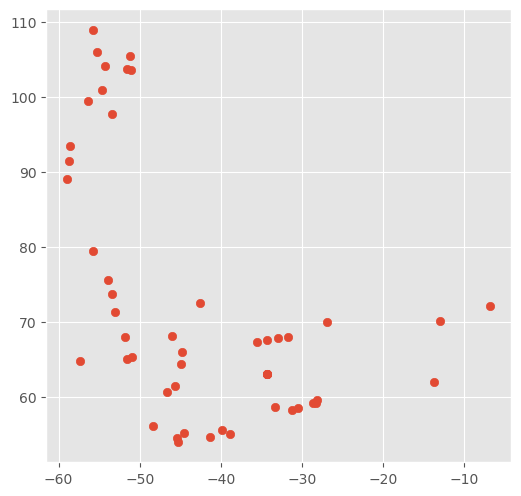

In [10]:
fig = plt.figure(figsize=(6,6), dpi=100)

scatter(X,Y)

In [5]:
def get_routs(routs_index):
    routs = []
    for rout in routs_index:
        rout_X = []
        rout_Y = []
        for vertex in rout:
            rout_X.append(X[vertex])
            rout_Y.append(Y[vertex])
        routs.append([rout_X, rout_Y])
    return routs

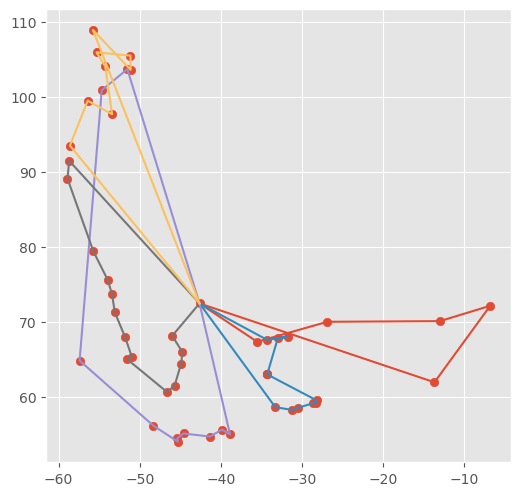

In [14]:
routs_index = [[0, 27, 31, 1, 47, 2, 0,0],
[0, 28, 30, 29, 40, 39, 41, 42, 25, 20, 19, 17, 16, 18, 0,0],
[0, 24, 23, 22, 21, 15, 26, 36, 48, 14, 11, 0,0],
[0, 49, 50, 37, 38, 35, 8, 9, 10, 4, 5, 6, 7, 32, 33, 0,0],
[0, 34, 3, 43, 44, 46, 13, 12, 45, 0,0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(6,6), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
# lenght: 2424.16

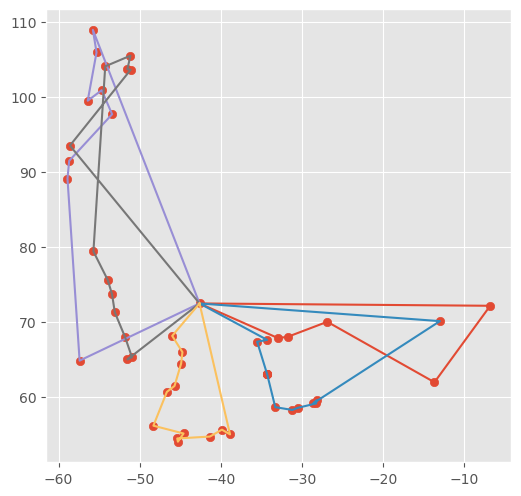

In [15]:
routs_index = [[0, 29, 30, 31, 2, 47, 0, 0],
[0, 28, 27, 41, 39, 40, 42, 18, 16, 17, 20, 25, 19, 1, 0, 0],
[0, 48, 32, 33, 43, 14, 3, 46, 45, 0, 0],
[0, 8, 9, 10, 4, 5, 6, 7, 44, 13, 11, 12, 34, 0, 0],
[0, 49, 50, 37, 38, 35, 36, 21, 26, 15, 22, 23, 24, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(6,6), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
# lenght: 2422.59

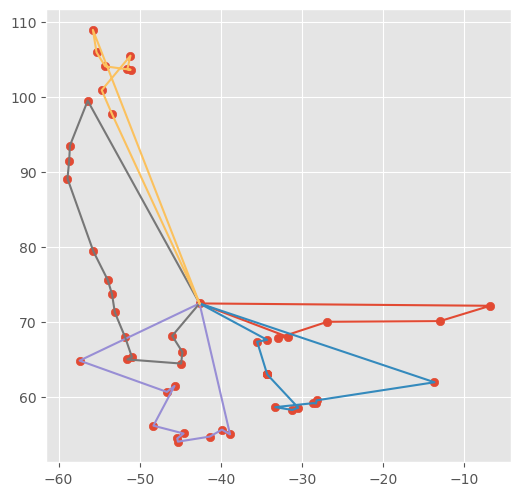

In [18]:
routs_index = [[0, 30, 29, 31, 1, 47, 0, 0],
[0, 28, 27, 39, 40, 41, 42, 17, 16, 18, 19, 20, 25, 2, 0, 0],
[0, 24, 23, 22, 26, 15, 21, 36, 38, 35, 48, 0, 0],
[0, 49, 50, 37, 8, 9, 10, 4, 5, 6, 7, 32, 33, 34, 3, 0, 0],
[0, 45, 46, 44, 12, 11, 13, 14, 43, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(6,6), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
# lenght: 955.544
# 30 sec

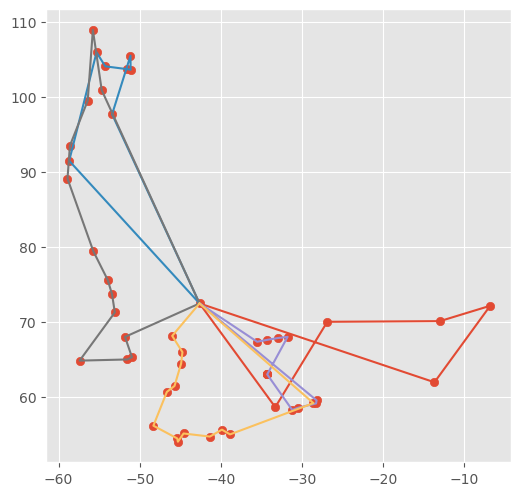

In [19]:
routs_index = [[0, 2, 47, 1, 31, 18, 0, 0],
[0, 43, 13, 12, 11, 44, 46, 33, 0, 0],
[0, 27, 28, 29, 30, 42, 39, 40, 41, 16, 17, 20, 25, 0, 0],
[0, 10, 9, 8, 48, 4, 5, 6, 7, 32, 34, 3, 45, 14, 0, 0],
[0, 49, 50, 37, 38, 35, 36, 15, 26, 21, 22, 23, 24, 19, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(6,6), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
# lenght: 942.758
# 30 sec

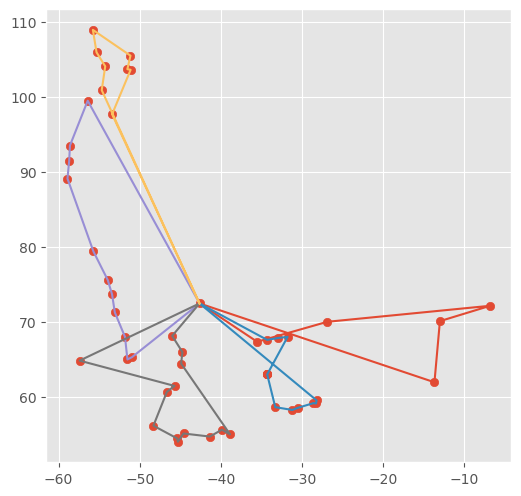

In [20]:
routs_index = [[0, 27, 31, 47, 1, 2, 0, 0],
[0, 28, 29, 30, 42, 41, 39, 40, 18, 16, 17, 19, 20, 25, 0, 0],
[0, 9, 8, 10, 4, 5, 6, 7, 32, 33, 34, 3, 0, 0],
[0, 49, 50, 37, 24, 23, 22, 21, 26, 15, 36, 35, 38, 48, 0, 0],
[0, 43, 12, 11, 13, 45, 46, 44, 14, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(6,6), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
# lenght: 911.274
# 30 sec

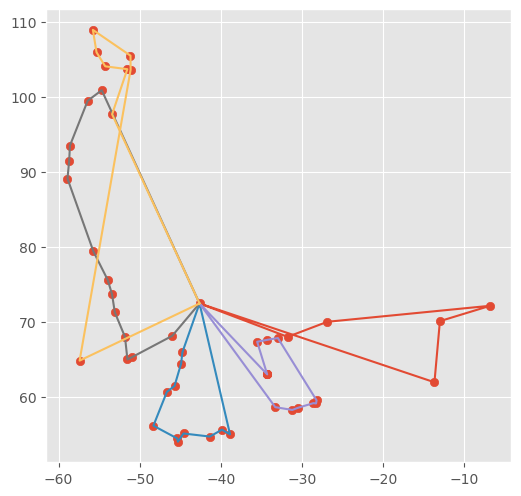

In [6]:
#ANT

routs_index = [[0, 30, 31, 47, 1, 2, 0, 0],
[0, 50, 37, 38, 35, 36, 15, 26, 21, 22, 23, 24, 0, 0],
[0, 18, 16, 17, 19, 20, 25, 29, 28, 27, 39, 40, 41, 42, 0, 0],
[0, 49, 9, 8, 10, 4, 5, 6, 7, 32, 33, 34, 3, 14, 0, 0],
[0, 48, 12, 13, 45, 46, 44, 11, 43, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(6,6), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
# lenght: 936.201
# 30 sec

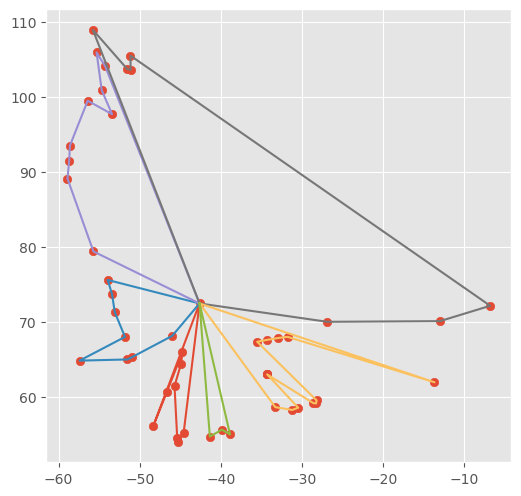

In [7]:
#SWEEP

routs_index = [[0, 21, 26, 15, 38, 37, 50, 35, 36, 0, 0],
[0, 49, 9, 8, 48, 10, 4, 5, 6, 0, 0],
[0, 7, 32, 33, 34, 3, 43, 14, 46, 44, 0, 0],
[0, 45, 11, 12, 13, 47, 1, 31, 0, 0],
[0, 2, 30, 29, 28, 27, 25, 20, 19, 39, 40, 41, 42, 17, 16, 18, 0, 0],
[0, 24, 23, 22, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(6,6), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
# lenght: 936.201
# 30 sec

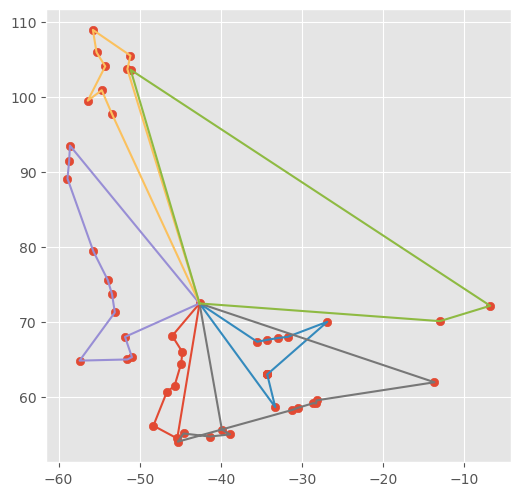

In [8]:
#greedy_test

routs_index = [[0, 49, 50, 37, 38, 35, 36, 15, 0, 0],
[0, 27, 28, 29, 30, 31, 39, 40, 41, 42, 18, 0, 0],
[0, 10, 9, 8, 48, 4, 5, 6, 7, 32, 33, 34, 0, 0],
[0, 23, 24, 22, 21, 26, 16, 17, 19, 20, 25, 2, 0, 0],
[0, 43, 14, 3, 44, 46, 45, 13, 11, 0, 0],
[0, 1, 47, 12, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(6,6), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
# lenght: 936.201
# 30 sec